In [95]:
import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('sub_seoul.csv')
data = data.iloc[:, :-1]
data.head(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202204,1호선,동대문,812,15,11003,1903,8733,6709,14349,...,4384,8253,24,1688,0,0,0,0,0,0
1,202204,1호선,동묘앞,149,3,2621,836,3154,4384,5793,...,1360,3651,12,2351,0,0,0,0,0,0
2,202204,1호선,서울역,614,13,8437,5992,11117,39884,36446,...,16553,13335,99,1246,1,0,0,0,0,0
3,202204,1호선,시청,113,2,1846,4740,2977,19406,6416,...,7878,2667,48,313,1,2,1,0,0,0
4,202204,1호선,신설동,296,16,8113,2455,8037,10747,17594,...,3287,8533,70,1588,0,1,0,0,0,0


In [97]:
data.tail(5)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
51416,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,111,633,3,222,0,0,0,0,0,0
51417,201501,중앙선,원덕,1,0,292,4,415,46,537,...,8,383,3,157,0,0,0,0,0,0
51418,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
51419,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0
51420,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,18205,35702,767,9314,0,0,0,0,0,0


In [98]:
#역명의 공백 제거
data['지하철역'] = data['지하철역'].str.strip()
data['지하철역'] = data['지하철역'].str.replace(" ", "")

In [99]:
data['지하철역']

0        동대문
1        동묘앞
2        서울역
3         시청
4        신설동
        ... 
51416    운길산
51417     원덕
51418     중랑
51419     팔당
51420     회기
Name: 지하철역, Length: 51421, dtype: object

In [100]:
# 승, 하차 구분
info = data.iloc[:, :3]
info.columns = ['년월일', '호선', '역명']
info.head()

,년월일,호선,역명
0,202204,1호선,동대문
1,202204,1호선,동묘앞
2,202204,1호선,서울역
3,202204,1호선,시청
4,202204,1호선,신설동


In [101]:
# 승차
riding = data.iloc[:, 3:]   
riding = riding.iloc[:,[0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46]]
riding.rename(columns={'04시-05시 승차인원':'4시', '05시-06시 승차인원':'5시', '06시-07시 승차인원':'6시','07시-08시 승차인원':'7시',
                       '08시-09시 승차인원':'8시','09시-10시 승차인원':'9시','10시-11시 승차인원':'10시','11시-12시 승차인원':'11시',
                       '12시-13시 승차인원':'12시','13시-14시 승차인원':'13시','14시-15시 승차인원':'14시','15시-16시 승차인원':'15시',
                      '16시-17시 승차인원':'16시','17시-18시 승차인원':'17시','18시-19시 승차인원':'18시','19시-20시 승차인원':'19시',
                      '20시-21시 승차인원':'20시','21시-22시 승차인원':'21시','22시-23시 승차인원':'22시','23시-24시 승차인원':'23시',
                      '00시-01시 승차인원':'24시','01시-02시 승차인원':'1시','02시-03시 승차인원':'2시','03시-04시 승차인원':'3시'}, inplace=True)
riding = pd.concat([info, riding], axis=1)
riding.head()

,년월일,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
0,202204,1호선,동대문,812,11003,8733,14349,18644,16383,15308,...,23501,16703,13628,12565,10798,4384,24,0,0,0
1,202204,1호선,동묘앞,149,2621,3154,5793,9665,7790,9003,...,22976,10289,5506,4515,3501,1360,12,0,0,0
2,202204,1호선,서울역,614,8437,11117,36446,59887,45821,45901,...,177631,88591,62407,66272,44170,16553,99,1,0,0
3,202204,1호선,시청,113,1846,2977,6416,8087,8195,9789,...,138249,48858,39892,38465,24871,7878,48,1,1,0
4,202204,1호선,신설동,296,8113,8037,17594,25283,17379,15577,...,53177,20237,13506,12173,9011,3287,70,0,0,0


In [102]:
# 하차
stopover = data.iloc[:, 3:]
stopover = stopover.iloc[:,[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47]]
stopover.rename(columns={'04시-05시 하차인원':'4시', '05시-06시 하차인원':'5시', '06시-07시 하차인원':'6시','07시-08시 하차인원':'7시',
                       '08시-09시 하차인원':'8시','09시-10시 하차인원':'9시','10시-11시 하차인원':'10시','11시-12시 하차인원':'11시',
                       '12시-13시 하차인원':'12시','13시-14시 하차인원':'13시','14시-15시 하차인원':'14시','15시-16시 하차인원':'15시',
                      '16시-17시 하차인원':'16시','17시-18시 하차인원':'17시','18시-19시 하차인원':'18시','19시-20시 하차인원':'19시',
                      '20시-21시 하차인원':'20시','21시-22시 하차인원':'21시','22시-23시 하차인원':'22시','23시-24시 하차인원':'23시',
                      '00시-01시 하차인원':'24시','01시-02시 하차인원':'1시','02시-03시 하차인원':'2시','03시-04시 하차인원':'3시'}, inplace=True)
stopover = pd.concat([info, stopover], axis=1)
stopover.head()

,년월일,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,18시,19시,20시,21시,22시,23시,24시,1시,2시,3시
0,202204,1호선,동대문,15,1903,6709,11903,22388,21407,21119,...,18617,18341,12679,10202,8940,8253,1688,0,0,0
1,202204,1호선,동묘앞,3,836,4384,9172,21300,17137,20342,...,10276,6781,4546,4438,4960,3651,2351,0,0,0
2,202204,1호선,서울역,13,5992,39884,89690,183383,119576,63394,...,78619,51420,34412,30243,22270,13335,1246,0,0,0
3,202204,1호선,시청,2,4740,19406,60192,172361,75383,33183,...,18578,8548,5209,4714,3427,2667,313,2,0,0
4,202204,1호선,신설동,16,2455,10747,23623,58536,31263,21022,...,25530,18282,12058,11251,10137,8533,1588,1,0,0


In [104]:
# 승차 인원 합계
riding['합계'] = riding.sum(axis=1)
stopover['합계'] = stopover.sum(axis=1)
riding.head()

C:\Users\ch980\AppData\Local\Temp/ipykernel_10988/3955563570.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  riding['합계'] = riding.sum(axis=1)
C:\Users\ch980\AppData\Local\Temp/ipykernel_10988/3955563570.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stopover['합계'] = stopover.sum(axis=1)


,년월일,호선,역명,4시,5시,6시,7시,8시,9시,10시,...,19시,20시,21시,22시,23시,24시,1시,2시,3시,합계
0,202204,1호선,동대문,812,11003,8733,14349,18644,16383,15308,...,16703,13628,12565,10798,4384,24,0,0,0,1053424
1,202204,1호선,동묘앞,149,2621,3154,5793,9665,7790,9003,...,10289,5506,4515,3501,1360,12,0,0,0,959736
2,202204,1호선,서울역,614,8437,11117,36446,59887,45821,45901,...,88591,62407,66272,44170,16553,99,1,0,0,2768468
3,202204,1호선,시청,113,1846,2977,6416,8087,8195,9789,...,48858,39892,38465,24871,7878,48,1,1,0,1548784
4,202204,1호선,신설동,296,8113,8037,17594,25283,17379,15577,...,20237,13506,12173,9011,3287,70,0,0,0,1150744


In [31]:
# 승차
df_r = riding[['년월일', '호선', '역명', '합계']]
df_r.head()

,년월일,호선,역명,합계
0,202204,1호선,동대문,526712
1,202204,1호선,동묘앞,479868
2,202204,1호선,서울역,1384234
3,202204,1호선,시청,774392
4,202204,1호선,신설동,575372


In [32]:
# 하차
df_s = stopover[['년월일', '호선', '역명', '합계']]
df_s.head()

,년월일,호선,역명,합계
0,202204,1호선,동대문,510000
1,202204,1호선,동묘앞,491328
2,202204,1호선,서울역,1351966
3,202204,1호선,시청,783560
4,202204,1호선,신설동,565949


In [33]:
# 승차
dfg_r = df_r.groupby(['년월일','호선','역명'])['합계'].mean()

In [26]:
dfg_r.head()

년월일     호선   역명 
201501  1호선  동대문     685290.0
             동묘앞     487051.0
             서울역    2362117.0
             시청      950070.0
             신설동     714195.0
Name: 합계, dtype: float64

In [34]:
# 하차
dfg_s = df_s.groupby(['년월일','호선','역명'])['합계'].mean()

In [35]:
dfg_s.head()

년월일     호선   역명 
201501  1호선  동대문     744000.0
             동묘앞     502159.0
             서울역    2118269.0
             시청      944482.0
             신설동     696821.0
Name: 합계, dtype: float64

In [36]:
# 데이터프레임 수정
# 승차
dfg2_r = pd.DataFrame(dfg_r)
dfg2_r = dfg2_r.reset_index()
dfg2_r.head()

,년월일,호선,역명,합계
0,201501,1호선,동대문,685290.0
1,201501,1호선,동묘앞,487051.0
2,201501,1호선,서울역,2362117.0
3,201501,1호선,시청,950070.0
4,201501,1호선,신설동,714195.0


In [37]:
# 하차
dfg2_s = pd.DataFrame(dfg_s)
dfg2_s = dfg2_s.reset_index()
dfg2_s.head()

,년월일,호선,역명,합계
0,201501,1호선,동대문,744000.0
1,201501,1호선,동묘앞,502159.0
2,201501,1호선,서울역,2118269.0
3,201501,1호선,시청,944482.0
4,201501,1호선,신설동,696821.0


In [38]:
# 합계 컬럼 --> 이용객수
dfg2_r.columns = ['년월일', '호선', '역명', '이용객수']
dfg2_s.columns = ['년월일', '호선', '역명', '이용객수']
dfg2_s

,년월일,호선,역명,이용객수
0,201501,1호선,동대문,744000.0
1,201501,1호선,동묘앞,502159.0
2,201501,1호선,서울역,2118269.0
3,201501,1호선,시청,944482.0
4,201501,1호선,신설동,696821.0
...,...,...,...,...
51332,202204,중앙선,원덕,216166.0
51333,202204,중앙선,중랑,352247.0
51334,202204,중앙선,지평,204781.0
51335,202204,중앙선,팔당,238622.0


In [39]:
# 승하차 평균값으로 1년 1일 평균 이용객 수 알아보기 
dfg3_r = pd.DataFrame(round(dfg2_r.groupby(['호선', '역명'])['이용객수'].mean()))
dfg3_s = pd.DataFrame(round(dfg2_s.groupby(['호선', '역명'])['이용객수'].mean()))
dfg3_s

이용객수
호선  역명            
1호선 동대문   660229.0
    동묘앞   509022.0
    서울역  1643180.0
    시청    888656.0
    신설동   637456.0
...            ...
중앙선 원덕    213647.0
    중랑    363451.0
    지평    203487.0
    팔당    231399.0
    회기    995372.0

[686 rows x 1 columns]

In [40]:
# 이용객수로 정렬
dfg3_r = dfg3_r.sort_values(by='이용객수', ascending=False)
dfg3_s = dfg3_s.sort_values(by='이용객수', ascending=False)
dfg3_s.head(20)

이용객수
호선  역명                    
2호선 강남           2972894.0
    잠실           2533679.0
    홍대입구         2397390.0
    잠실(송파구청)     2391024.0
    신림           2151326.0
    삼성           2005753.0
    구로디지털단지      1972970.0
    신도림          1860533.0
    서울대입구        1789032.0
    삼성(무역센터)     1775909.0
3호선 고속터미널        1770830.0
2호선 강변           1738015.0
    역삼           1651709.0
1호선 서울역          1643180.0
경부선 영등포          1637125.0
2호선 서울대입구(관악구청)  1609840.0
3호선 양재           1545224.0
2호선 선릉           1542442.0
    을지로입구        1536291.0
    사당           1535712.0

In [41]:
# 인덱스 리빌드
dfg4_r = pd.DataFrame(dfg3_r)
dfg4_r = dfg4_r.reset_index()
dfg4_r.head()

,호선,역명,이용객수
0,2호선,강남,2949662.0
1,2호선,잠실,2730351.0
2,2호선,잠실(송파구청),2487815.0
3,2호선,홍대입구,2261785.0
4,2호선,신림,2201847.0


In [42]:
dfg4_s = pd.DataFrame(dfg3_s)
dfg4_s = dfg4_s.reset_index()
dfg4_s.head()

,호선,역명,이용객수
0,2호선,강남,2972894.0
1,2호선,잠실,2533679.0
2,2호선,홍대입구,2397390.0
3,2호선,잠실(송파구청),2391024.0
4,2호선,신림,2151326.0


In [47]:
dinfo = pd.read_csv('map_seo.csv')

In [48]:
dinfo.head()

,전철역명,호선,X좌표(WGS),Y좌표(WGS)
0,종로3가,1,37.571607,126.991806
1,동대문,1,37.571420,127.009745
2,서울,1,37.554648,126.972559
3,신도림,1,37.508725,126.891295
4,시청,1,37.564718,126.977108


In [49]:
dinfo.columns = ['역명', '호선', '위도', '경도']
dinfo.head()

,역명,호선,위도,경도
0,종로3가,1,37.571607,126.991806
1,동대문,1,37.571420,127.009745
2,서울,1,37.554648,126.972559
3,신도림,1,37.508725,126.891295
4,시청,1,37.564718,126.977108


In [50]:
dinfo['역명'] = dinfo['역명'].str.strip()
dinfo['역명'] = dinfo['역명'].str.replace(" ", "")

In [51]:
dfg4_r['호선'].unique()

array(['2호선', '3호선', '1호선', '경부선', '4호선', '7호선', '경인선', '5호선', '9호선',
       '과천선', '중앙선', '분당선', '경원선', '8호선', '안산선', '일산선', '6호선', '9호선2~3단계',
       '공항철도 1호선', '9호선2단계', '경의선', '경강선', '경춘선', '수인선', '우이신설선', '장항선'],
      dtype=object)

In [52]:
# 1~9 호선 까지만 분리. 
dfg4_r = dfg4_r[dfg4_r['호선'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'])]
dfg4_s = dfg4_s[dfg4_s['호선'].isin(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선'])]

In [55]:
dfg4_r.loc[dfg4_r['호선']=='1호선', '호선'] = 1
dfg4_r.loc[dfg4_r['호선']=='2호선', '호선'] = 2
dfg4_r.loc[dfg4_r['호선']=='3호선', '호선'] = 3
dfg4_r.loc[dfg4_r['호선']=='4호선', '호선'] = 4
dfg4_r.loc[dfg4_r['호선']=='5호선', '호선'] = 5
dfg4_r.loc[dfg4_r['호선']=='6호선', '호선'] = 6
dfg4_r.loc[dfg4_r['호선']=='7호선', '호선'] = 7
dfg4_r.loc[dfg4_r['호선']=='8호선', '호선'] = 8
dfg4_r.loc[dfg4_r['호선']=='9호선', '호선'] = 9

In [56]:

dfg4_s.loc[dfg4_s['호선']=='1호선', '호선'] = 1
dfg4_s.loc[dfg4_s['호선']=='2호선', '호선'] = 2
dfg4_s.loc[dfg4_s['호선']=='3호선', '호선'] = 3
dfg4_s.loc[dfg4_s['호선']=='4호선', '호선'] = 4
dfg4_s.loc[dfg4_s['호선']=='5호선', '호선'] = 5
dfg4_s.loc[dfg4_s['호선']=='6호선', '호선'] = 6
dfg4_s.loc[dfg4_s['호선']=='7호선', '호선'] = 7
dfg4_s.loc[dfg4_s['호선']=='8호선', '호선'] = 8
dfg4_s.loc[dfg4_s['호선']=='9호선', '호선'] = 9

In [57]:
# 역정보와 이용객수 merge
# 승차
df_m_r = pd.merge(dfg4_r, dinfo, how='inner')
df_m_r

,호선,역명,이용객수,위도,경도
0,2,강남,2949662.0,37.497175,127.027926
1,2,강남,2949662.0,37.497175,127.027926
2,2,잠실,2730351.0,37.513950,127.102234
3,2,잠실,2730351.0,37.513950,127.102234
4,2,홍대입구,2261785.0,37.557192,126.925381
...,...,...,...,...,...
407,2,도림천,234591.0,37.514287,126.882768
408,3,충무로,201870.0,37.561243,126.994280
409,3,충무로,201870.0,37.561243,126.994280
410,6,연신내,201845.0,37.619001,126.921008


In [58]:
# 하차
df_m_s = pd.merge(dfg4_s, dinfo, how='inner')
df_m_s

,호선,역명,이용객수,위도,경도
0,2,강남,2972894.0,37.497175,127.027926
1,2,강남,2972894.0,37.497175,127.027926
2,2,잠실,2533679.0,37.513950,127.102234
3,2,잠실,2533679.0,37.513950,127.102234
4,2,홍대입구,2397390.0,37.557192,126.925381
...,...,...,...,...,...
407,7,장암,230937.0,37.700109,127.053196
408,6,연신내,201824.0,37.619001,126.921008
409,6,연신내,201824.0,37.619001,126.921008
410,3,충무로,201824.0,37.561243,126.994280


In [59]:
# 중복제거
df_m_r_2 = df_m_r.drop_duplicates('이용객수', keep='first')
df_m_s_2 = df_m_s.drop_duplicates('이용객수', keep='first')

In [60]:
# 상위, 하위 30개 역 표시
# 승차
dfm_top_r = df_m_r_2.head(30)
dfm_bottom_r = df_m_r_2.tail(30)

# 하차
dfm_top_s = df_m_s_2.head(30)
dfm_bottom_s = df_m_s_2.tail(30)

In [61]:
dfm_top_r.head()

,호선,역명,이용객수,위도,경도
0,2,강남,2949662.0,37.497175,127.027926
2,2,잠실,2730351.0,37.513950,127.102234
4,2,홍대입구,2261785.0,37.557192,126.925381
7,2,신림,2201847.0,37.484201,126.929715
8,2,구로디지털단지,1971810.0,37.485266,126.901401


In [62]:
dfm_bottom_r.head()

,호선,역명,이용객수,위도,경도
368,5,청구,319099.0,37.560245,127.013828
370,3,무악재,319035.0,37.582299,126.950291
371,2,신설동,316371.0,37.575297,127.025087
374,9,신목동,315822.0,37.544277,126.883080
375,6,역촌,313076.0,37.606021,126.922744


In [63]:
import folium 

map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map

In [64]:
map2 = folium.Map(location=[37.497175, 127.027926], zoom_start=13)
folium.Marker([37.497175, 127.027926]).add_to(map2)
folium.CircleMarker([37.497175, 127.027926], radius=10, 
                              color='green', fill=True).add_to(map2)
map2

In [65]:
# 지도로 승차 상위 이용객 30개역 표시 
map3 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_top_r.index:
    lat = dfm_top_r.loc[item, '위도']
    long = dfm_top_r.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_top_r.loc[item, '이용객수']/70000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map3)
    
map3.save('seoul_metro_riding_top30.html')
map3

In [66]:
# 지도로 하차 상위 이용객 30개역 표시 
map4 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_top_s.index:
    lat = dfm_top_s.loc[item, '위도']
    long = dfm_top_s.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_top_s.loc[item, '이용객수']/70000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map4)
    
map4.save('seoul_metro_stopover_top30.html')
map4

In [67]:
# 지도로 승차 하위 이용객 30개역 표시 
map5 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_bottom_r.index:
    lat = dfm_bottom_r.loc[item, '위도']
    long = dfm_bottom_r.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_bottom_r.loc[item, '이용객수']/20000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map5)
    
map5.save('seoul_metro_riding_bottom30.html')
map5

In [68]:

# 지도로 하차 하위 이용객 30개역 표시 
map6 = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for item in dfm_bottom_s.index:
    lat = dfm_bottom_s.loc[item, '위도']
    long = dfm_bottom_s.loc[item, '경도']
    folium.CircleMarker([lat,long],
                                    #radius=10,
                                   radius=dfm_bottom_s.loc[item, '이용객수']/20000,
                                   #popup=dfm_top_r.loc[item, '역명'],
                                   color='green',
                                    fill = True).add_to(map6)
    
map6.save('seoul_metro_stopover_bottom30.html')
map6

In [105]:
yearmonth_list = []
    
for date in data['사용월']:
    year = str(date)[:4]
    yearmonth_list.append(year)

data['연도'] = yearmonth_list

data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,연도
0,202204,1호선,동대문,812,15,11003,1903,8733,6709,14349,...,8253,24,1688,0,0,0,0,0,0,2022
1,202204,1호선,동묘앞,149,3,2621,836,3154,4384,5793,...,3651,12,2351,0,0,0,0,0,0,2022
2,202204,1호선,서울역,614,13,8437,5992,11117,39884,36446,...,13335,99,1246,1,0,0,0,0,0,2022
3,202204,1호선,시청,113,2,1846,4740,2977,19406,6416,...,2667,48,313,1,2,1,0,0,0,2022
4,202204,1호선,신설동,296,16,8113,2455,8037,10747,17594,...,8533,70,1588,0,1,0,0,0,0,2022


In [106]:
data_time_list = [ ]
for i in data.columns:
    if i[8:] == '승차인원':
        print(i)
        
        data_time_list.append(i)

04시-05시 승차인원
05시-06시 승차인원
06시-07시 승차인원
07시-08시 승차인원
08시-09시 승차인원
09시-10시 승차인원
10시-11시 승차인원
11시-12시 승차인원
12시-13시 승차인원
13시-14시 승차인원
14시-15시 승차인원
15시-16시 승차인원
16시-17시 승차인원
17시-18시 승차인원
18시-19시 승차인원
19시-20시 승차인원
20시-21시 승차인원
21시-22시 승차인원
22시-23시 승차인원
23시-24시 승차인원
00시-01시 승차인원
01시-02시 승차인원
02시-03시 승차인원
03시-04시 승차인원


In [107]:
df_data = data.pivot_table(index = '연도', values = data_time_list, aggfunc = 'sum' )

df_data

,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원
연도,,,,,,,,,,,,,,,,,,,,,
2015,6378153,37377,432,126,1231385,37060654,79377923,211065409,235233552,147866822,...,128953655,140195578,156923779,188027254,257626532,168512720,129366277,124681934,107504218,48970945
2016,6254834,44022,506,111,1293747,37717876,79600067,209306690,233537968,147966930,...,129274349,140864475,159010398,190900254,260818557,167732272,128827180,124550153,105939939,48285101
2017,6160621,35528,446,7,1341712,38047812,78332978,204914146,232488586,147454558,...,129624699,141373554,160926714,193275965,265469774,164309041,125793033,121293459,102759076,47084360
2018,6122331,40616,8160,473,1449316,38403999,77497987,203571266,234692683,149364291,...,130482442,143274229,164198740,200303336,272835680,160909343,124679000,119013071,100504557,46010184
2019,6208867,33378,533,7,1534721,39041585,77405753,204545510,239772383,153819913,...,134642615,148284200,170044626,209761139,278981753,158984572,125148564,119626888,99915900,45288078
2020,1387731,5841,528,238,1389136,32684087,64879435,165812830,189666926,112442738,...,91743475,101107898,117052492,160293661,220483051,117178400,88342713,80218037,61837542,24073603
2021,129880,518,109,2,1391574,32394797,66866265,168669046,191200543,114444613,...,96353939,106967832,125136495,167736974,219560425,112090281,87289730,84948795,61240269,13118020
2022,45978,201,49,0,411014,9934548,20938779,53251610,61217024,37195467,...,32438730,36064548,41970946,55287029,70822981,35950615,29547818,29221613,17925553,5719856


In [108]:
df_data.reset_index()

,연도,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,...,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원
0,2015,6378153,37377,432,126,1231385,37060654,79377923,211065409,235233552,...,128953655,140195578,156923779,188027254,257626532,168512720,129366277,124681934,107504218,48970945
1,2016,6254834,44022,506,111,1293747,37717876,79600067,209306690,233537968,...,129274349,140864475,159010398,190900254,260818557,167732272,128827180,124550153,105939939,48285101
2,2017,6160621,35528,446,7,1341712,38047812,78332978,204914146,232488586,...,129624699,141373554,160926714,193275965,265469774,164309041,125793033,121293459,102759076,47084360
3,2018,6122331,40616,8160,473,1449316,38403999,77497987,203571266,234692683,...,130482442,143274229,164198740,200303336,272835680,160909343,124679000,119013071,100504557,46010184
4,2019,6208867,33378,533,7,1534721,39041585,77405753,204545510,239772383,...,134642615,148284200,170044626,209761139,278981753,158984572,125148564,119626888,99915900,45288078
5,2020,1387731,5841,528,238,1389136,32684087,64879435,165812830,189666926,...,91743475,101107898,117052492,160293661,220483051,117178400,88342713,80218037,61837542,24073603
6,2021,129880,518,109,2,1391574,32394797,66866265,168669046,191200543,...,96353939,106967832,125136495,167736974,219560425,112090281,87289730,84948795,61240269,13118020
7,2022,45978,201,49,0,411014,9934548,20938779,53251610,61217024,...,32438730,36064548,41970946,55287029,70822981,35950615,29547818,29221613,17925553,5719856


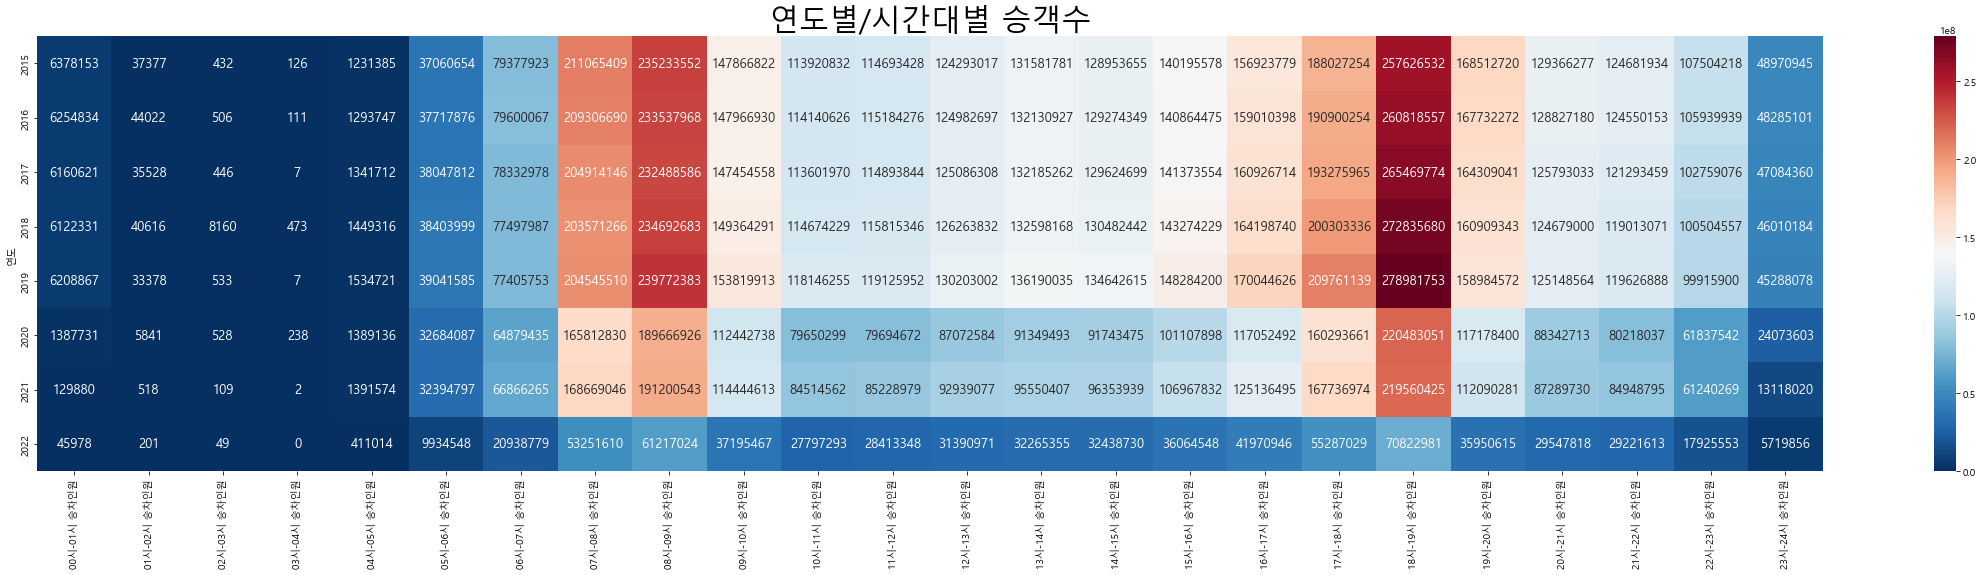

In [109]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns


font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

matplotlib.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(figsize =(40, len(df_data)))
plt.title('연도별/시간대별 승객수', fontsize = 30)

sns.heatmap(df_data, cmap = 'RdBu_r', annot = True, fmt = '.0f', annot_kws = {"size" : 13});